<a href="https://colab.research.google.com/github/ImTeddyGraham/Data-ML-Projects/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
# measure 
def dist(x,y, norm=2):
  return np.power(sum(np.power(abs(x-y), norm)), 1/norm)

In [ ]:
class KMeans:
  
  def __init__(self, K=5, max_iters=100, plot_steps=False):
    self.K = K
    self.max_iters = max_iters
    self.plot_steps = plot_steps

    # List of clusters. Each cluster is a list of indicies for  sample points 
    self.clusters = [[] for _ in range(self.K)]
    # Mean feature vector for each cluster
    self.centroids = []

  def predict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    # Randomly initialize centroids
    self.centroids = self.X[np.random.choice(self.n_samples, size=self.K, replace=False)]

    # Initialize centroids
    
    # Optimization 
    for _ in range(self.max_iters):
      # update clusters 
      self.clusters = self._create_clusters(self.centroids)
      if self.plot_steps:
        self.plot()
      # update centroids 
      centroids_old = self.centroids
      self.centroids = self._get_centroids(self.clusters)
      if self.plot_steps:
        self.plot()
      # check for convergence
      if self._is_converged(centroids_old, self.centroids):
        break

    # return cluster labels
    return self._get_cluster_labels(self.clusters)

  def _get_cluster_labels(self, clusters):
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx
      return labels

  def _create_clusters(self, centroids): 
    clusters = [[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
      centroid_idx = self._closest_centroid(sample, centroids)
      clusters[centroid_idx].append(idx)
    return clusters

  def _closest_centroid(self, sample, centroids):
    distances = [dist(sample, c_point) for c_point in centroids]
    closest_idx = np.argmin(distances)
    return closest_idx 
  
  def _get_centroids(self, clusters):
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean
    return centroids

  def _is_converged(self, centroids_old, centroids):
    distances = [dist(centroids_old[i], centroids[i]) for i in range(self.K)]
    return sum(distances) == 0  
  
  def plot(self):
    fig, ax = plt.subplots(figsize = (12,8))

    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point)
    
    for point in self.centroids:
      ax.scatter(*point, marker="x", color="black", linewidth=2)
    plt.show()

In [ ]:
X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
print(X.shape)

(500, 2)


In [ ]:
clusters = len(np.unique(y))
print(clusters)

3


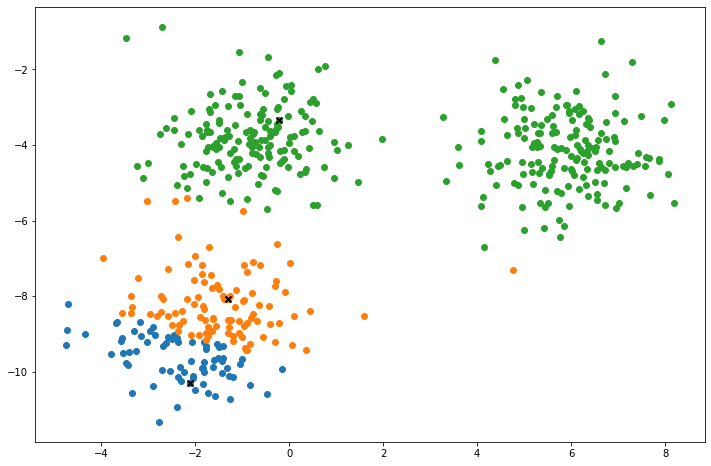

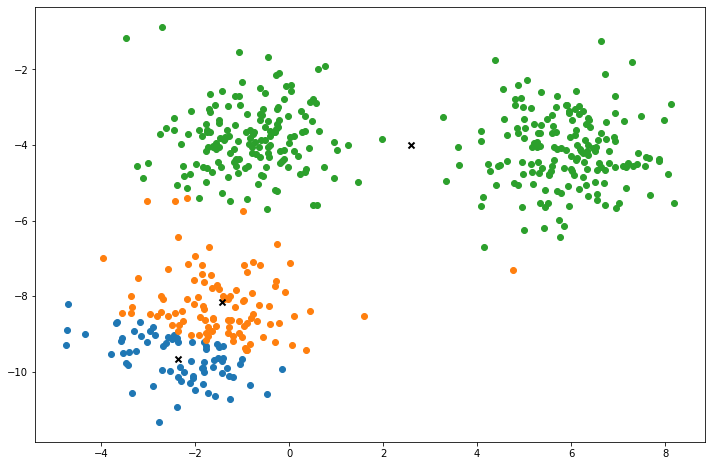

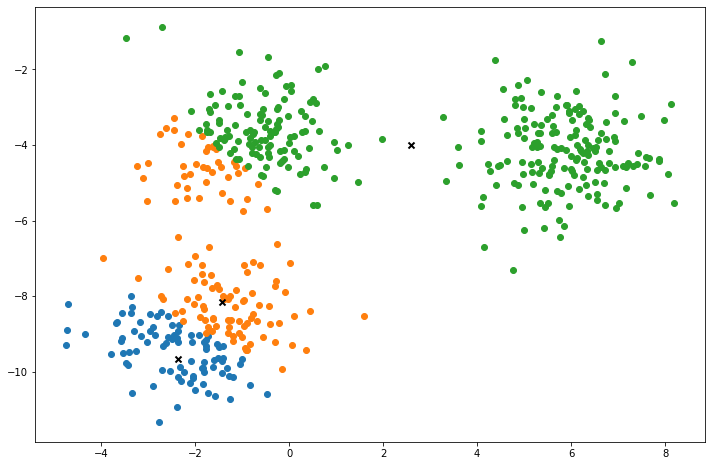

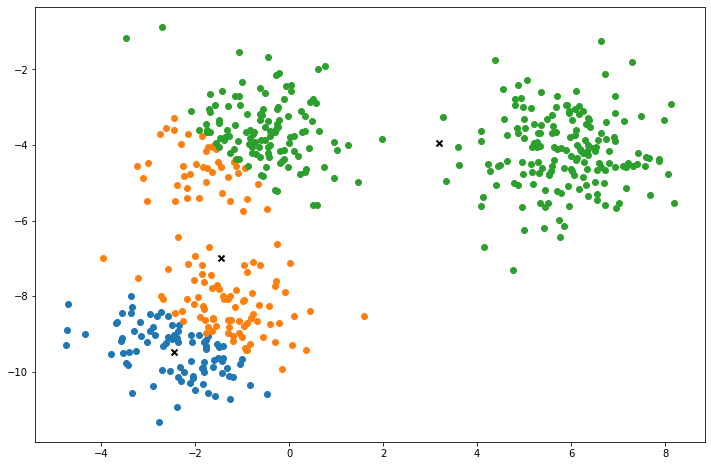

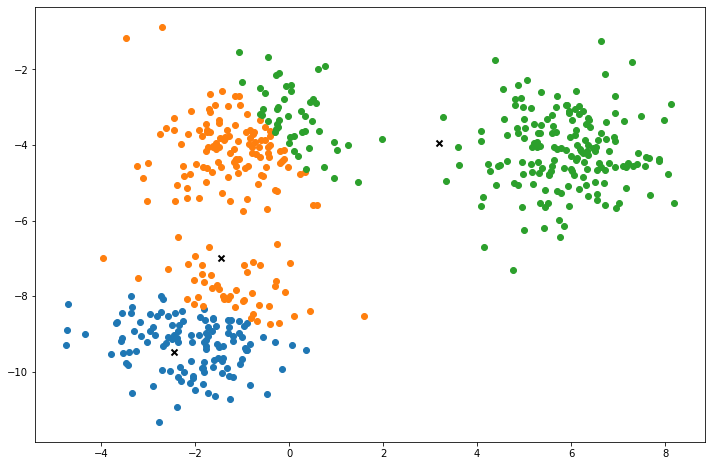

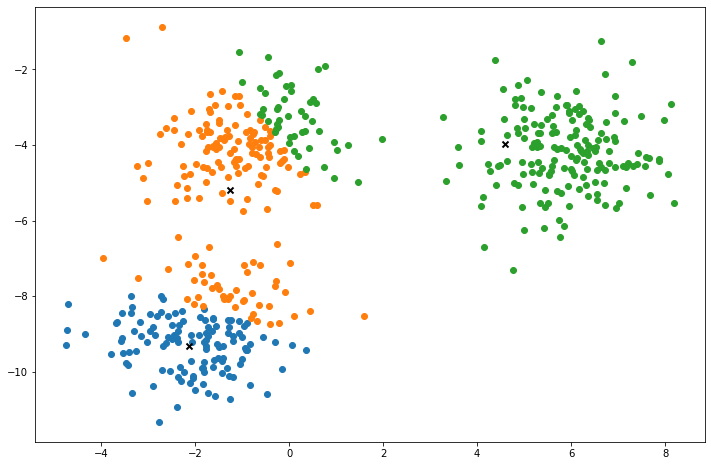

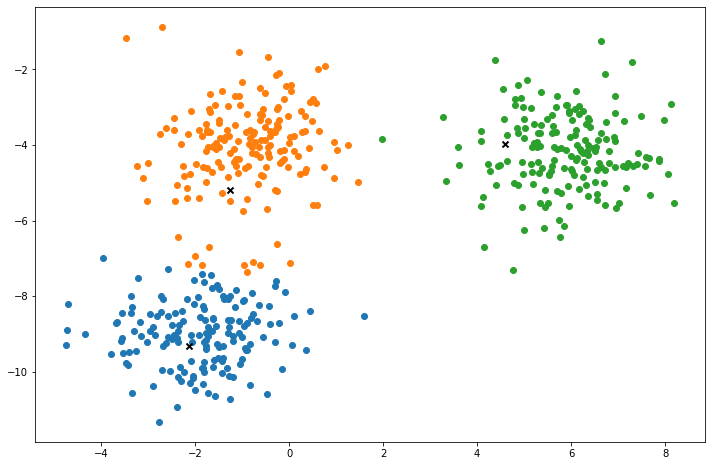

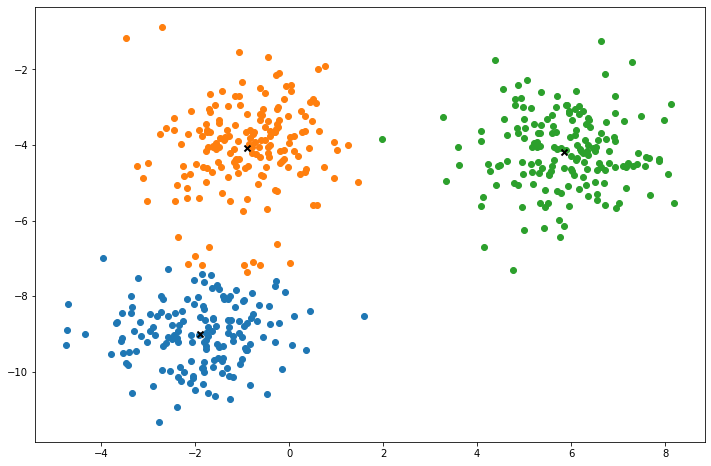

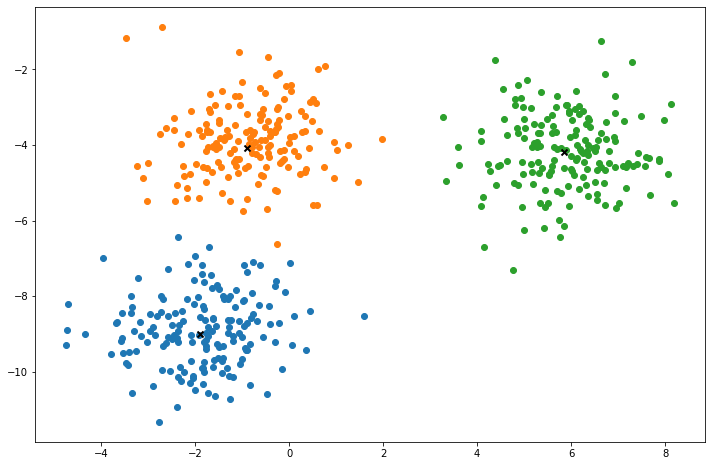

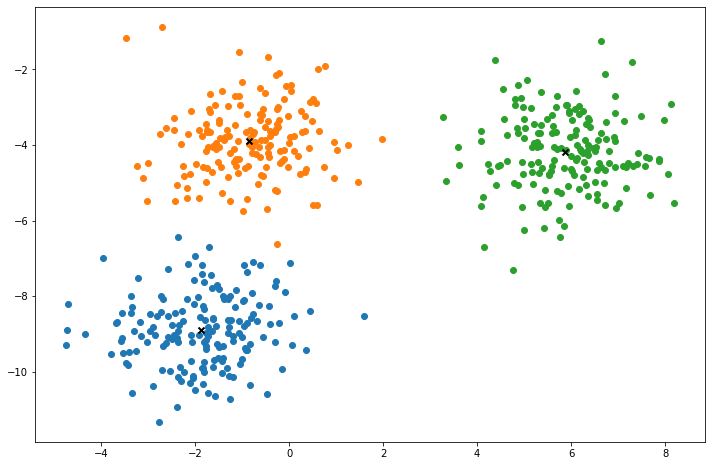

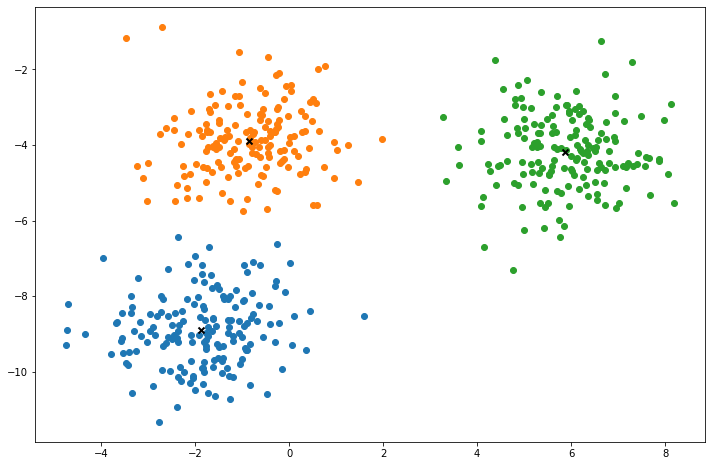

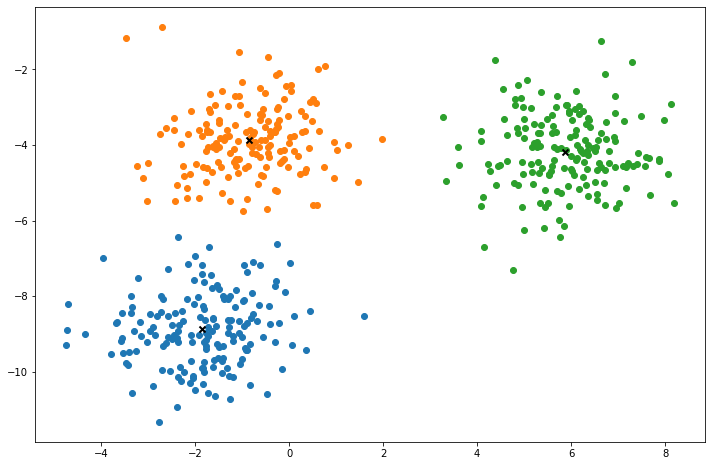

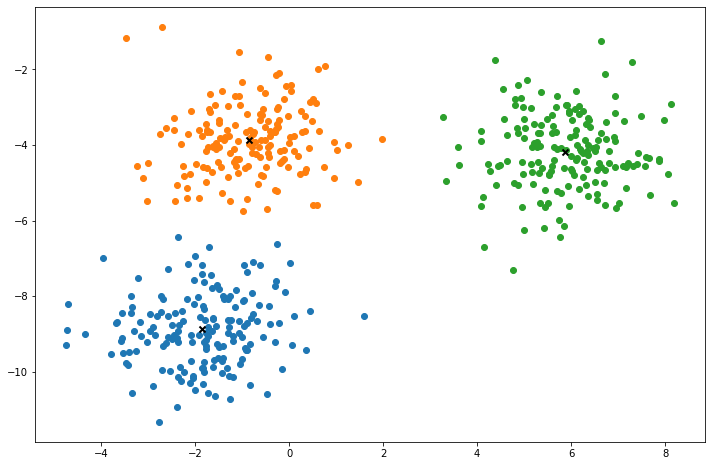

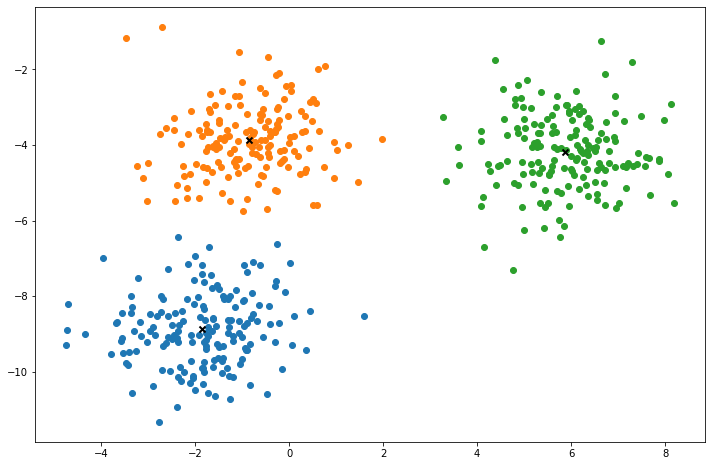

In [ ]:
k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)